LOAD DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Inline matplotlib to view inside this notebook directly
%matplotlib inline

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay


In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


EXPLOARTORY DATA ANALYSIS (EDA)

In [3]:
df.shape

(1025, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


DATA VISUALIZATION

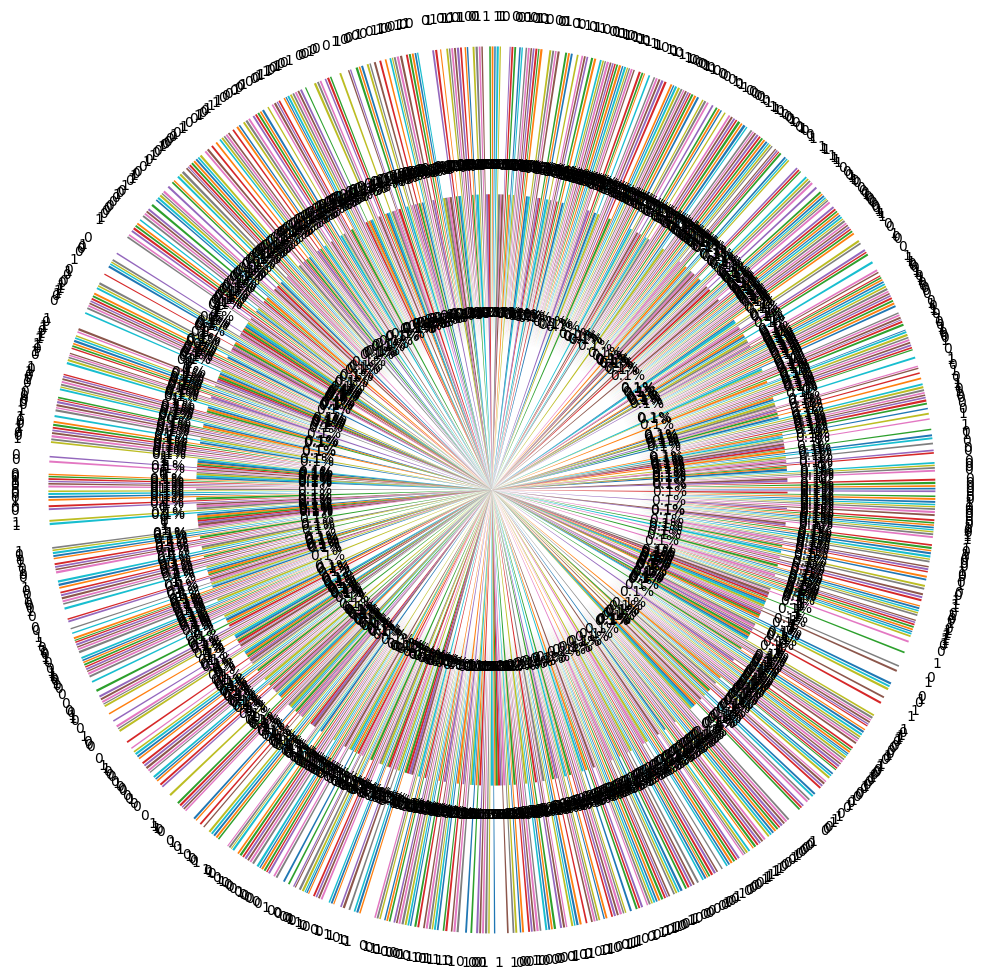

In [66]:
plt.pie(df.age,df.sex,df.target,radius=2,autopct='%0.1f%%')
plt.show()

In [7]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

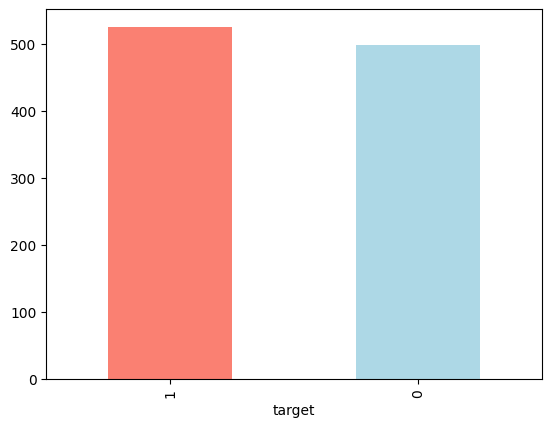

In [8]:
df["target"].value_counts().plot(kind='bar', color=["salmon","lightblue"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [13]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


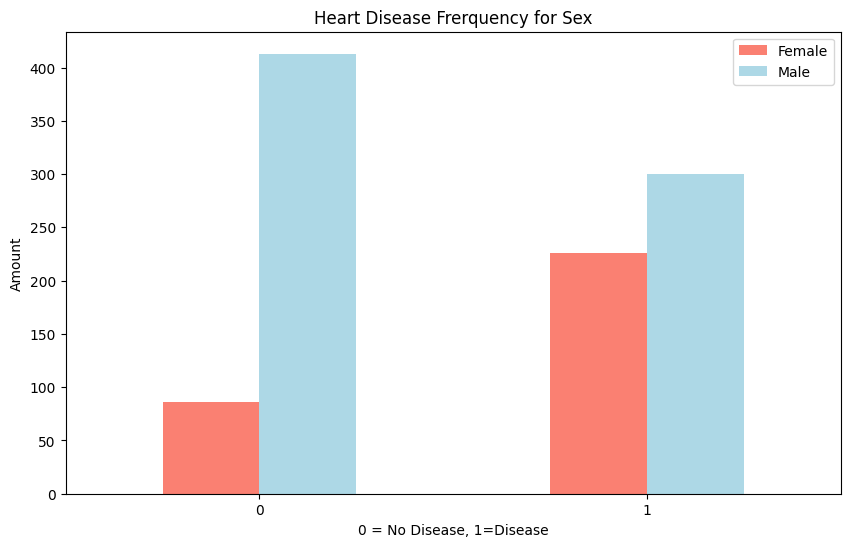

In [69]:
pd.crosstab(df.target, df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frerquency for Sex")
plt.xlabel("0 = No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);

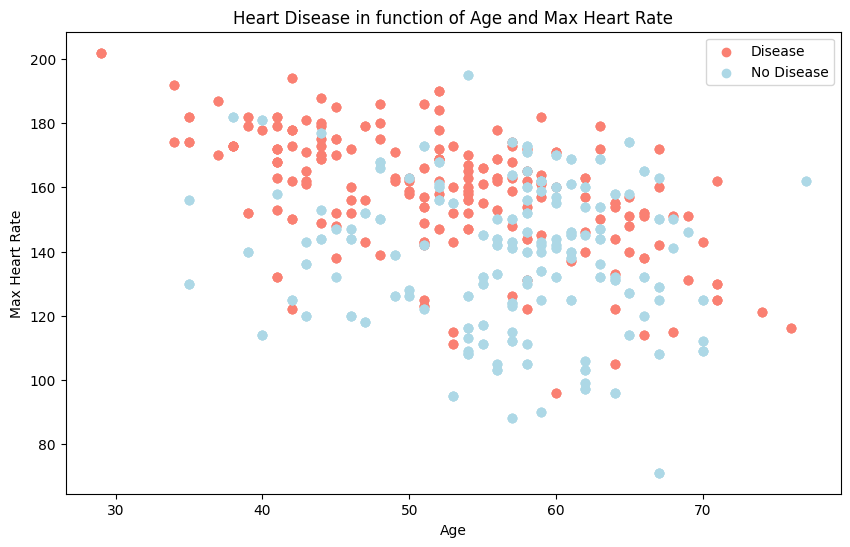

In [15]:
#Create new figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

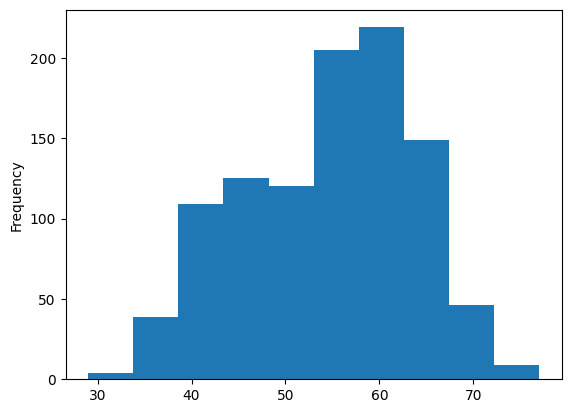

In [16]:
#Check the distribution of the age column with a histogram
#May check for outliers of the data
df.age.plot.hist()

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

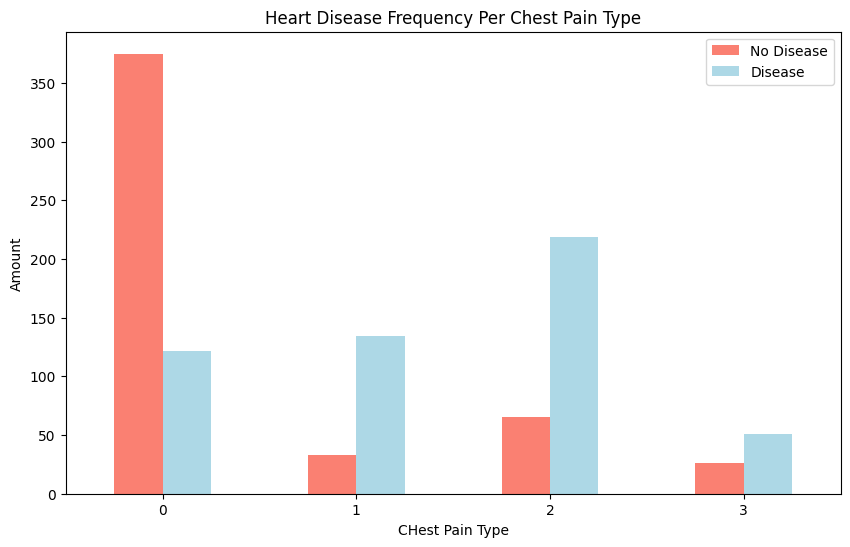

In [18]:
# Make corsstab visualise
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("CHest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


(14.5, -0.5)

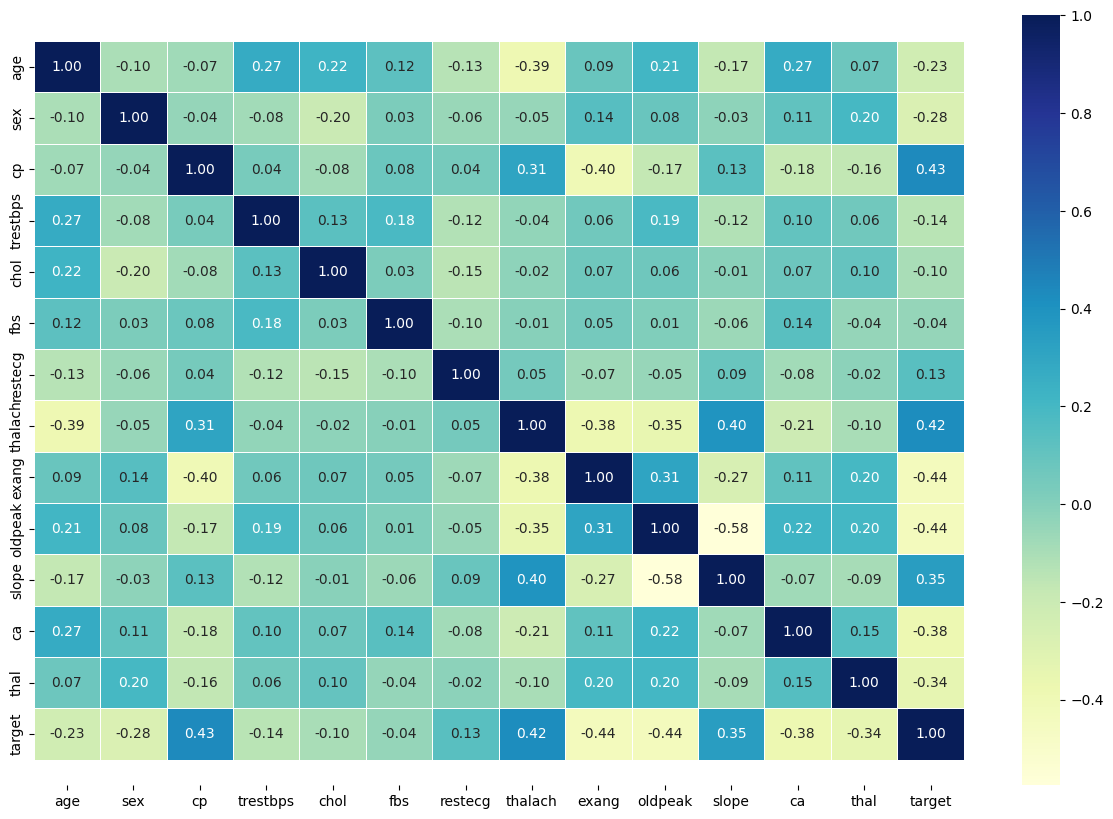

In [20]:
corr_matrix = df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

Text(0, 0.5, 'Target')

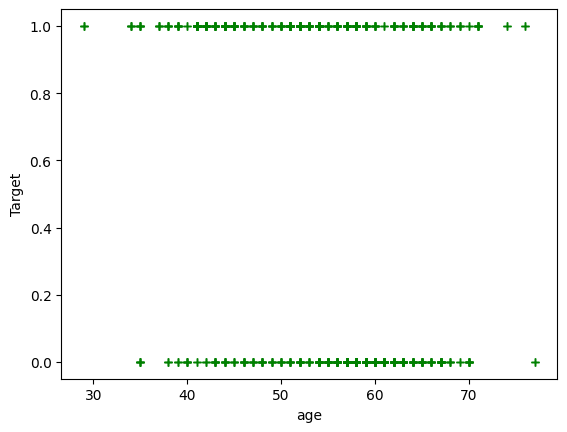

In [72]:
plt.plot(df.age,df.target,'g+')
plt.xlabel("age")
plt.ylabel("Target")


In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot for males (sex = 1) without the disease (target = 0)
plt.scatter(
    df.sex[(df.target == 0) & (df.sex == 1)],  # x-axis: sex for males without disease
    df.target[(df.target == 0) & (df.sex == 1)],  # y-axis: target for males without disease
    c="salmon", 
    label="Male,(No Disease)",


    df.sex[(df.target == 0) & (df.sex == 0)],  
    df.target[(df.target == 0) & (df.sex == 0)], 
    label="Female,(No Disease)"
)


plt.title("Prediction: People Alive Based on Male and Female", fontsize=14)
plt.xlabel("Sex (0 = Female, 1 = Male)", fontsize=12)
plt.ylabel("Target (0 = No Disease)", fontsize=12)
plt.legend()
plt.show()


SyntaxError: positional argument follows keyword argument (3602674552.py, line 16)

In [21]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


TRAINING A MODEL

In [22]:
#Split data into X and y for training features and target variable
X=df.drop("target",axis=1)
y=df["target"]

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

USED FUNCTION TO SAVE TIME

In [63]:
model={"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}


def get_Score(model,x_train,x_test,y_train,y_test):
    predicted_object = {}
    for name,model in model.items():
           model.fit(x_train,y_train)
           predicted_object[name]=model.score(x_test,y_test)
    return predicted_object
        
    

In [64]:
model_score=get_Score(model=model,x_train=X_train,x_test=X_test,y_train=y_train,y_test=y_test)
model_score

{'Logistic Regression': 0.8634146341463415,
 'KNN': 0.7170731707317073,
 'Random Forest': 1.0}

DECISION TREE CLASSIFIER USED 

In [29]:
from sklearn import tree
decision_tree= tree.DecisionTreeClassifier()

In [32]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
decision_tree.score(X_train,y_train)

1.0

In [35]:
y_predicted=decision_tree.predict(X_test)

In [38]:
decision_tree.score(X_test,y_test)

1.0

In [36]:
y_predicted

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1], dtype=int64)

CONFUSIN MATRIX FOR DECISON TREE

In [42]:
print("confusion matrix \n",confusion_matrix(y_test,y_predicted))

confusion matrix 
 [[ 99   0]
 [  0 106]]


In [43]:
print("confusion matrix \n",classification_report(y_test,y_predicted))

confusion matrix 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



RANDOM FORREST CLASSIFIER

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forrest=RandomForestClassifier()

In [46]:
random_forrest.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
random_predicted=random_forrest.predict(X_test)

In [52]:
print("confusion matrix \n",confusion_matrix(y_test,random_predicted))

confusion matrix 
 [[ 99   0]
 [  0 106]]


In [53]:
print("confusion matrix \n",classification_report(y_test,random_predicted))

confusion matrix 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



LOGISTIC REGRESSION CLASSIFIER

In [24]:
log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

#Setup grid hyperparameter for LR
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

#Fit into model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [25]:
import tkinter as tk
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def diagnosis():
    v1 = int(entry_1.get())
    v2 = int(entry_2.get())
    v3 = int(entry_3.get())
    v4 = int(entry_4.get())
    v5 = int(entry_5.get())
    v6 = int(entry_6.get())
    v7 = int(entry_7.get())
    v8 = int(entry_8.get())
    v9 = int(entry_9.get())
    v10 = float(entry_10.get())
    v11 = int(entry_12.get())
    v12 = int(entry_13.get())
    v13 = int(entry_14.get())
    l3.config(text="Disease")
    
    y_predm = gs_log_reg.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13]])
    res = int(y_predm[0])
    if res==0:
        l3.config(text="Patient Has No Heart Disease : ")
    else:
        l3.config(text="Patient Has Heart Disease : ")
   
    

In [ ]:
my_w = tk.Tk()
#my_w.configure(background='silver')
my_w.geometry("900x550")  # Size of the window 
my_w.title('Heart Disease Diagnosis System')
my_font1=('times', 24, 'bold')
my_font2=('times', 10, 'bold')

l1 = tk.Label(my_w,text='Heart Disease Diagnosis System',width=30,font=my_font1)  
#l1.grid(row=1,column=1)
l1.place(x=130,y=15)

labl_1 = Label(my_w, text="Age",width=20,font=("bold", 10))  
labl_1.place(x=30,y=100)  
  
entry_1 = Entry(my_w)  
entry_1.place(x=160,y=100)  
  
labl_2 = Label(my_w, text="Sex",width=20,font=("bold", 10))  
labl_2.place(x=30,y=130)  
  
entry_2 = Entry(my_w)  
entry_2.place(x=160,y=130)  

labl_3 = Label(my_w, text="CP",width=20,font=("bold", 10))  
labl_3.place(x=30,y=160)  
  
entry_3 = Entry(my_w)  
entry_3.place(x=160,y=160)  

labl_4 = Label(my_w, text="Trestbps",width=20,font=("bold", 10))  
labl_4.place(x=30,y=190)  
  
entry_4 = Entry(my_w)  
entry_4.place(x=160,y=190)  


labl_5 = Label(my_w, text="Chol",width=20,font=("bold", 10))  
labl_5.place(x=30,y=220)  
  
entry_5 = Entry(my_w)  
entry_5.place(x=160,y=220)  


labl_6 = Label(my_w, text="FPS",width=20,font=("bold", 10))  
labl_6.place(x=30,y=250)  
  
entry_6 = Entry(my_w)  
entry_6.place(x=160,y=250)  

labl_7 = Label(my_w, text="Restecg",width=20,font=("bold", 10))  
labl_7.place(x=30,y=280)  
  
entry_7 = Entry(my_w)  
entry_7.place(x=160,y=280)  

labl_8 = Label(my_w, text="Thalach",width=20,font=("bold", 10))  
labl_8.place(x=30,y=310)  
  
entry_8 = Entry(my_w)  
entry_8.place(x=160,y=310)  

labl_9 = Label(my_w, text="Exang",width=20,font=("bold", 10))  
labl_9.place(x=30,y=340)  
  
entry_9 = Entry(my_w)  
entry_9.place(x=160,y=340) 


labl_10 = Label(my_w, text="Old Peak",width=20,font=("bold", 10))  
labl_10.place(x=30,y=370)  
  
entry_10 = Entry(my_w)  
entry_10.place(x=160,y=370)  

labl_11 = Label(my_w, text="Slope",width=20,font=("bold", 10))  
labl_11.place(x=30,y=400)  
  
entry_12 = Entry(my_w)  
entry_12.place(x=160,y=400)  

labl_13 = Label(my_w, text="CA",width=20,font=("bold", 10))  
labl_13.place(x=30,y=430)  
  
entry_13 = Entry(my_w)  
entry_13.place(x=160,y=430)  

labl_14 = Label(my_w, text="Thal",width=20,font=("bold", 10))  
labl_14.place(x=30,y=460)  
  
entry_14 = Entry(my_w)  
entry_14.place(x=160,y=460)  

b4 = tk.Button(my_w, text='Diagnosis', width=20,command = diagnosis)
b4.place(x=400,y=150)

l3 = tk.Label(my_w,text='Result',font=my_font1)  
#l3.grid(row=5,column=1)
l3.place(x=400,y=200)

my_w.mainloop() 
